In [2]:
import pandas as pd

# Community risk factors for obesity (socioeconomic, other lifestyle factors)
# INFO ABOUT DATASETS:

1. Demographics: Includes measures such as: population density, race, poverty, age
2. Risk factors: Includes dietary information, exercise information, obesity rates, high BP, smoker
3. Vulnerable pops: Includes number unemployed, disabled, major depression, drug use, no hs diploma

CLEANED DATASET IS THE FINAL CLEANED DATASET

Ten features: Poverty, no HS diploma, race (white vs non white), unemployed, depresssion, no exercise, fruits/veg, uninsured, diabetes, high bp

Given numerical values, divide by population to get prevalence.

In [3]:
#Read in dataset
obesity = pd.read_csv('CleanedData.csv')
#The cleaned dataset used the population column to find

#Population and county name were removed from the relevant feature columns
feature_cols= ["No_Exercise", "Few_Fruit_Veg", "Poverty", "No_HS_Diploma", 
      "Major_Depression", "Diabetes", "Non-White", "Uninsured", "High_Blood_Pres", "Obesity"]

In [4]:
obesity = obesity[feature_cols]

In [5]:
obesity["Obesity"].max()

38.7

In [6]:
obesity["Obesity"].min()

8.7

In [7]:
obesity["Obesity"].median()

24.0

In [8]:
obesity["Obesity"].mean()

23.913430758524683

In [9]:
obesity["Obesity"].std()

4.354526571489824

In [10]:
#Based on the distribution of scores,
#Low obesity prevalence (<1std below mean) was determined to be < 20%
#Moderate prevalence (between -1 and +1 std dev of the mean) was determined to be (20-28%)
#High prevalence (>1std above mean) was defined as (>28%)

In [11]:
def classify_prev(data):
    if(data < 22.1):
        return "Low"
    elif(data > 25.6):
        return "High"
    else:
        return "Moderate"

In [12]:
obesity["Obesity_Class"] = obesity["Obesity"].map(classify_prev)

In [13]:
obesity

,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres,Obesity,Obesity_Class
0,27.8,78.6,10.4,13.8,5.5,14.2,19.3,11.7,29.1,24.5,Moderate
1,27.2,76.2,10.2,12.5,5.8,7.2,11.6,12.2,30.5,23.6,Moderate
2,29.2,81.9,16.4,17.4,5.7,11.2,21.7,14.7,33.2,27.0,High
3,30.3,82.8,14.9,22.7,5.6,6.0,11.7,14.7,26.5,31.2,High
4,29.4,76.2,13.3,20.4,5.7,10.0,2.7,14.9,35.0,22.2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
1432,21.9,80.7,8.6,8.1,7.0,5.3,4.5,14.4,22.7,23.6,Moderate
1433,9.6,68.8,5.6,4.0,7.6,2.4,2.1,9.7,18.9,9.0,Low
1434,23.4,83.1,10.6,9.2,6.8,4.8,2.5,15.1,22.5,22.7,Moderate
1435,23.2,78.1,11.1,9.8,7.3,9.4,2.8,14.8,27.8,21.1,Low


In [14]:
#Remove "Obesity" prevalence column for analysis of correlations, only use Obesity_class
obesity_just_class = obesity.drop("Obesity", axis=1)

In [15]:
#Split target and feature columns
target = obesity["Obesity_Class"]
features = obesity_just_class.drop("Obesity_Class",axis=1)

In [16]:
target

0       Moderate
1       Moderate
2           High
3           High
4       Moderate
          ...   
1432    Moderate
1433         Low
1434    Moderate
1435         Low
1436    Moderate
Name: Obesity_Class, Length: 1437, dtype: object

In [17]:
features

,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres
0,27.8,78.6,10.4,13.8,5.5,14.2,19.3,11.7,29.1
1,27.2,76.2,10.2,12.5,5.8,7.2,11.6,12.2,30.5
2,29.2,81.9,16.4,17.4,5.7,11.2,21.7,14.7,33.2
3,30.3,82.8,14.9,22.7,5.6,6.0,11.7,14.7,26.5
4,29.4,76.2,13.3,20.4,5.7,10.0,2.7,14.9,35.0
...,...,...,...,...,...,...,...,...,...
1432,21.9,80.7,8.6,8.1,7.0,5.3,4.5,14.4,22.7
1433,9.6,68.8,5.6,4.0,7.6,2.4,2.1,9.7,18.9
1434,23.4,83.1,10.6,9.2,6.8,4.8,2.5,15.1,22.5
1435,23.2,78.1,11.1,9.8,7.3,9.4,2.8,14.8,27.8


In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    #'Support Vector Machine': LinearSVC(max_iter=100000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=9, random_state=3000, shuffle=True)
    
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

k-Nearest Neighbor: 
	mean accuracy=54.15%, standard deviation=3.46%

Gaussian Naive Bayes: 
	mean accuracy=56.86%, standard deviation=5.05%

Decision Tree: 
	mean accuracy=50.25%, standard deviation=4.23%



# Feature engineering obesity categories

Using discretization to create bins for obesity prevalence categories

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
discretizer = KBinsDiscretizer(n_bins=3, encode = "onehot-dense", strategy="quantile")

ob_discretized = discretizer.fit_transform(obesity["Obesity"].values.reshape(-1,1))

In [23]:
ob_discretized

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [24]:
ob_discrete_df = pd.DataFrame(ob_discretized, columns= ["Low", "Moderate", "High"])
ob_discrete_df

,Low,Moderate,High
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1432,0.0,1.0,0.0
1433,1.0,0.0,0.0
1434,0.0,1.0,0.0
1435,1.0,0.0,0.0


In [25]:
discretizer.bin_edges_

array([array([ 8.7, 22.1, 25.6, 38.7])], dtype=object)

# OBESITY BINS:

Low= 8.7-22.1
Moderate= 22.1-25.6
High = 25.6-38.7

*Using these bins, I changed the above formula for data transformation.*

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#select a classifier.
#model = LinearSVC(C=1, max_iter=100000)
model = KNeighborsClassifier(n_neighbors=10)
#model = DecisionTreeClassifier(max_depth=9)
#NOTE that max_iter value should be large so you won't get the warning message

#create the model by fitting the training data
model.fit(X=X_train, y=y_train)

print("Prediction accuracy on the training data:", format(model.score(X_train, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(model.score(X_test, y_test)*100, ".2f"))

Prediction accuracy on the training data: 65.46
Prediction accuracy on the test data: 56.67


In [49]:
#Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

print("Prediction accuracy on the training data:", format(model.score(X_train_scaled, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(model.score(X_test_scaled, y_test)*100, ".2f"))

Prediction accuracy on the training data: 34.08
Prediction accuracy on the test data: 30.00


Feature selection: Choosing the features that have the best relationship between features and target variable(s)


In [29]:
#Univariate selection: Features need to be significant on their own, not just along with other features

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#define a selection method
select = SelectKBest(k=6)
select.fit(X_train_scaled, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)

knn_og = KNeighborsClassifier().fit(X=X_train_scaled, y=y_train)
knn = KNeighborsClassifier().fit(X=X_train_selected, y=y_train)

print("Original train score: ", format(knn_og.score(X_train_scaled, y_train)*100, ".2f"))
print("Original test score: ", format(knn_og.score(X_test_scaled, y_test)*100, ".2f"))

print("New train score: ", format(knn.score(X_train_selected, y_train)*100, ".2f"))
print("New test score: ", format(knn.score(X_test_selected, y_test)*100, ".2f"))

Original train score:  70.29
Original test score:  55.56
New train score:  68.62
New test score:  52.22


In [31]:
select.get_support()

array([ True,  True, False,  True, False,  True, False, False,  True])

In [32]:
print(features.columns)

Index(['No_Exercise', 'Few_Fruit_Veg', 'Poverty', 'No_HS_Diploma',
       'Major_Depression', 'Diabetes', 'Non-White', 'Uninsured',
       'High_Blood_Pres'],
      dtype='object')


## Correlations between each feature and target

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

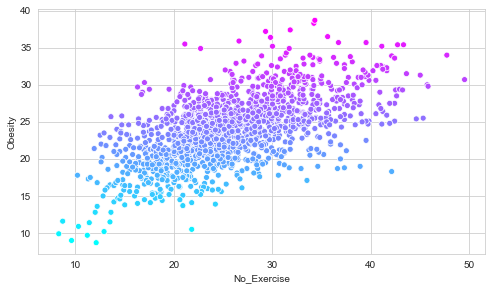

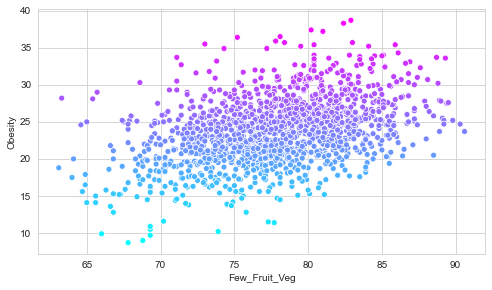

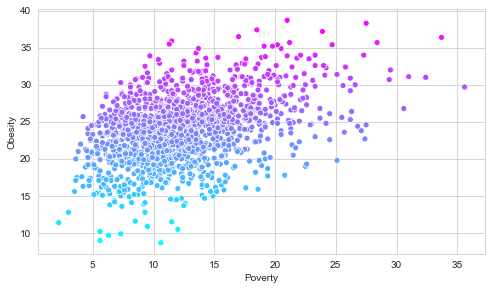

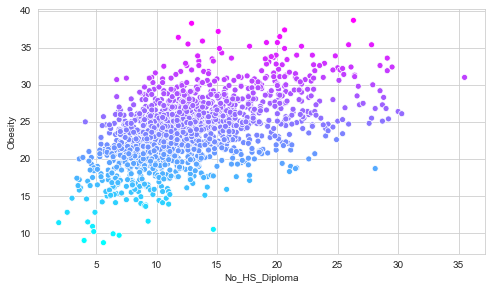

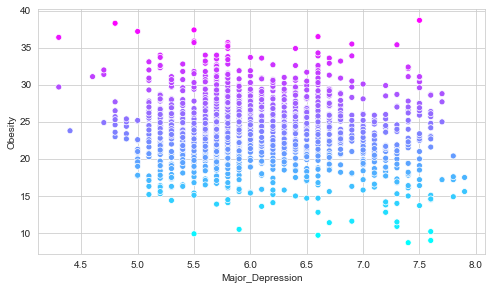

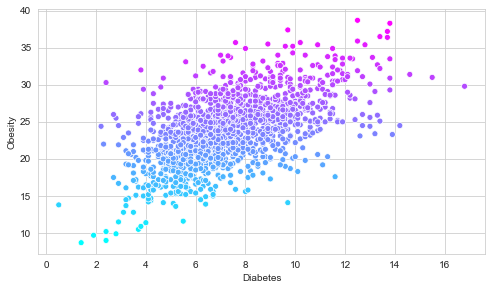

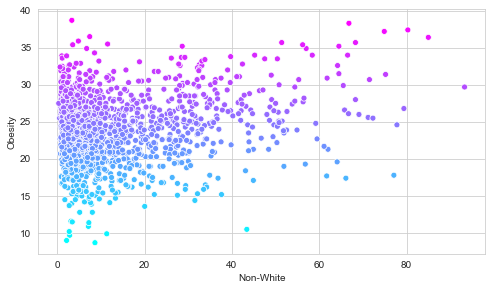

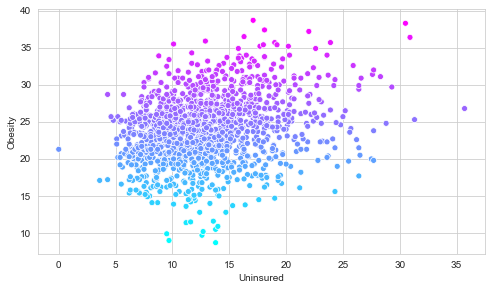

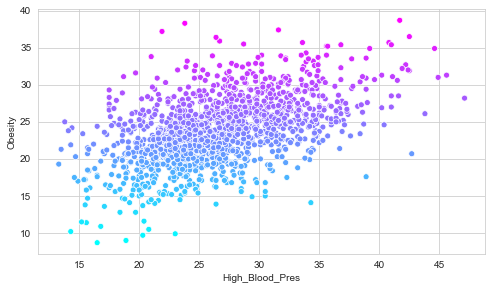

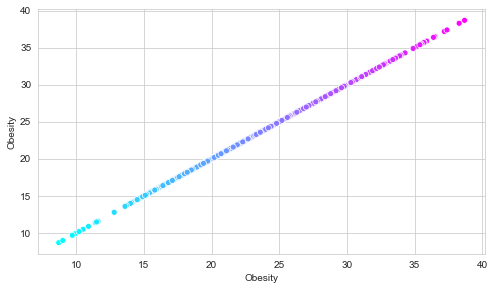

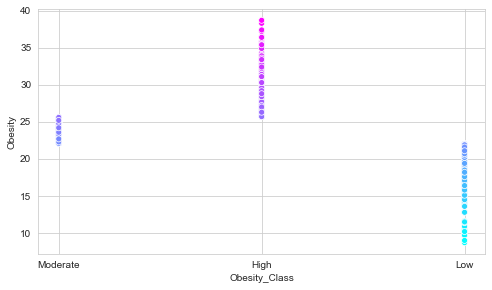

In [117]:
#iterate through feature names (list of all features in df)
# For each feature, produce a visualization for that value

#NOTE: This is plotting feature prevalence against obesity prevalence. It is using the original dataframe,
#which includes Obesity prevalence and thus will plot Obesity x Obesity. This should not be used for training.

for feature in obesity:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=obesity, x=feature, y='Obesity', hue='Obesity', palette='cool', legend=False)

# Training the model with least important features removed.
Using only the top 5 features: No exercise, few fruits/veg, no HS diploma, diabetes, high BP

In [34]:
top_five = ["No_Exercise", "Few_Fruit_Veg", "No_HS_Diploma", "Diabetes", "High_Blood_Pres", "Obesity_Class"]
obesity_top5 = obesity[top_five]

In [35]:
obesity_top5

,No_Exercise,Few_Fruit_Veg,No_HS_Diploma,Diabetes,High_Blood_Pres,Obesity_Class
0,27.8,78.6,13.8,14.2,29.1,Moderate
1,27.2,76.2,12.5,7.2,30.5,Moderate
2,29.2,81.9,17.4,11.2,33.2,High
3,30.3,82.8,22.7,6.0,26.5,High
4,29.4,76.2,20.4,10.0,35.0,Moderate
...,...,...,...,...,...,...
1432,21.9,80.7,8.1,5.3,22.7,Moderate
1433,9.6,68.8,4.0,2.4,18.9,Low
1434,23.4,83.1,9.2,4.8,22.5,Moderate
1435,23.2,78.1,9.8,9.4,27.8,Low


In [36]:
#Split into features and target
top5_features = obesity_top5.drop("Obesity_Class", axis=1)
top5_target = obesity_top5["Obesity_Class"]

In [38]:
#Perform train/test split
X_train5, X_test5, y_train5, y_test5 = train_test_split(top5_features, top5_target, random_state=3000)

top5_model = KNeighborsClassifier(n_neighbors=11)
#top5_model = LinearSVC(C=100, max_iter=1000000)
#top5_model = DecisionTreeClassifier(max_depth=5)
#top5_model = GaussianNB()

top5_model.fit(X=X_train5, y=y_train5)

print("Prediction accuracy on the training data:", format(top5_model.score(X_train5, y_train5)*100, ".2f"))
print("Prediction accuracy on the test data:", format(top5_model.score(X_test5, y_test5)*100, ".2f"))

Prediction accuracy on the training data: 62.77
Prediction accuracy on the test data: 54.17
